# はじめてのPython

In [ ]:
1+1

2

In [ ]:
!pip install numpy

## ライブラリの読み込み

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## データの読み込み

*   `flights`: 全てのフライト情報（出発/到着時間、遅延、航空会社、距離など）。これがメインのデータになります。
*   `airlines`: 航空会社のコードと正式名称の対応表。
*   `airports`: 空港のコード、名称、位置情報（緯度経度など）。
*   `planes`: 各航空機の製造情報など。
*   `weather`: NYCの3空港の1時間ごとの気象データ。

In [ ]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import requests # Webからデータを取得するため
from io import StringIO # テキストデータをファイルのように扱うため

# --- データ読み込み ---
# flights データ
url_flights = "https://raw.githubusercontent.com/tomoshige/website/refs/heads/main/docs/lectures/SIWS/datasets/flights.csv"
response_flights = requests.get(url_flights)
data_flights = StringIO(response_flights.text)
flights = pd.read_csv(data_flights)
print("flights データ読み込み完了")

# airlines データ
url_airlines = "https://raw.githubusercontent.com/tomoshige/website/refs/heads/main/docs/lectures/SIWS/datasets/airlines.csv"
response_airlines = requests.get(url_airlines)
data_airlines = StringIO(response_airlines.text)
airlines = pd.read_csv(data_airlines)
print("airlines データ読み込み完了")

# airports データ
url_airports = "https://raw.githubusercontent.com/tomoshige/website/refs/heads/main/docs/lectures/SIWS/datasets/airports.csv"
response_airports = requests.get(url_airports)
data_airports = StringIO(response_airports.text)
airports = pd.read_csv(data_airports)
print("airports データ読み込み完了")

# planes データ
url_planes = "https://raw.githubusercontent.com/tomoshige/website/refs/heads/main/docs/lectures/SIWS/datasets/planes.csv"
response_planes = requests.get(url_planes)
data_planes = StringIO(response_planes.text)
planes = pd.read_csv(data_planes)
print("planes データ読み込み完了")

# weather データ
url_weather = "https://raw.githubusercontent.com/tomoshige/website/refs/heads/main/docs/lectures/SIWS/datasets/weather.csv"
response_weather = requests.get(url_weather)
data_weather = StringIO(response_weather.text)
weather = pd.read_csv(data_weather)
print("weather データ読み込み完了")

flights データ読み込み完了
airlines データ読み込み完了
airports データ読み込み完了
planes データ読み込み完了
weather データ読み込み完了


## データフレームの概要をチェック

最初の数行を表示

In [ ]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00


データフレームの全体像を表示

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435352 entries, 0 to 435351
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            435352 non-null  int64  
 1   month           435352 non-null  int64  
 2   day             435352 non-null  int64  
 3   dep_time        424614 non-null  float64
 4   sched_dep_time  435352 non-null  int64  
 5   dep_delay       424614 non-null  float64
 6   arr_time        423899 non-null  float64
 7   sched_arr_time  435352 non-null  int64  
 8   arr_delay       422818 non-null  float64
 9   carrier         435352 non-null  object 
 10  flight          435352 non-null  int64  
 11  tailnum         433439 non-null  object 
 12  origin          435352 non-null  object 
 13  dest            435352 non-null  object 
 14  air_time        422818 non-null  float64
 15  distance        435352 non-null  int64  
 16  hour            435352 non-null  int64  
 17  minute    

データビューアでデータを見る

In [ ]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435347,2023,12,31,2218.0,2224,-6.0,304.0,325,-21.0,NK,364,N647NK,EWR,SJU,203.0,1608,22,24,2023-12-31 22:00:00
435348,2023,12,31,2243.0,2150,53.0,143.0,56,47.0,B6,367,N566JB,JFK,PBI,149.0,1028,21,50,2023-12-31 21:00:00
435349,2023,12,31,2248.0,2259,-11.0,338.0,350,-12.0,B6,283,N793JB,JFK,PSE,207.0,1617,22,59,2023-12-31 22:00:00
435350,2023,12,31,2326.0,2325,1.0,412.0,405,7.0,B6,313,N807JB,JFK,BQN,199.0,1576,23,25,2023-12-31 23:00:00


* `.head()`: 最初の数行を表示

In [ ]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00


* `.tail()`:最後のn行を表示

In [ ]:
flights.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
435347,2023,12,31,2218.0,2224,-6.0,304.0,325,-21.0,NK,364,N647NK,EWR,SJU,203.0,1608,22,24,2023-12-31 22:00:00
435348,2023,12,31,2243.0,2150,53.0,143.0,56,47.0,B6,367,N566JB,JFK,PBI,149.0,1028,21,50,2023-12-31 21:00:00
435349,2023,12,31,2248.0,2259,-11.0,338.0,350,-12.0,B6,283,N793JB,JFK,PSE,207.0,1617,22,59,2023-12-31 22:00:00
435350,2023,12,31,2326.0,2325,1.0,412.0,405,7.0,B6,313,N807JB,JFK,BQN,199.0,1576,23,25,2023-12-31 23:00:00
435351,2023,12,31,2345.0,2255,50.0,425.0,347,38.0,B6,126,N994JL,JFK,SJU,201.0,1598,22,55,2023-12-31 22:00:00


* `.sample()`: ランダムに数行を表示

In [ ]:
flights.sample(10) #10行を表示

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
184674,2023,5,30,1540.0,1540,0.0,1919.0,1847,32.0,DL,576,N327DN,LGA,FLL,157.0,1076,15,40,2023-05-30 15:00:00
10414,2023,1,11,621.0,630,-9.0,853.0,924,-31.0,NK,576,N937NK,LGA,MCO,129.0,950,6,30,2023-01-11 06:00:00
213443,2023,6,23,1318.0,1259,19.0,1447.0,1450,-3.0,DL,1048,N114DU,LGA,ORD,103.0,733,12,59,2023-06-23 12:00:00
54252,2023,2,15,1900.0,1820,40.0,2103.0,2008,55.0,YX,1602,N222JQ,LGA,BNA,127.0,764,18,20,2023-02-15 18:00:00
273288,2023,8,13,1325.0,1325,0.0,1541.0,1557,-16.0,B6,776,N766JB,LGA,ATL,108.0,762,13,25,2023-08-13 13:00:00
408300,2023,12,6,1505.0,1511,-6.0,1704.0,1717,-13.0,YX,1237,N134HQ,LGA,CLE,73.0,419,15,11,2023-12-06 15:00:00
88988,2023,3,15,1130.0,1135,-5.0,1404.0,1435,-31.0,DL,467,N326US,JFK,TPA,137.0,1005,11,35,2023-03-15 11:00:00
395839,2023,11,25,2044.0,2035,9.0,2239.0,2249,-10.0,B6,499,N304JB,JFK,DTW,89.0,509,20,35,2023-11-25 20:00:00
395920,2023,11,25,2237.0,2147,50.0,44.0,2350,54.0,YX,1092,N746YX,EWR,MEM,153.0,946,21,47,2023-11-25 21:00:00
259339,2023,8,1,1546.0,1510,36.0,1842.0,1823,19.0,DL,649,N348DN,JFK,MCO,129.0,944,15,10,2023-08-01 15:00:00


* `.columns`:列名を表示

In [ ]:
airlines.columns

Index(['carrier', 'name'], dtype='object')

* `データフレーム名['列名']`: 列名に対応する列を表示する

In [ ]:
print(airlines['name']) # 航空会社のデータ

0          Endeavor Air Inc.
1     American Airlines Inc.
2       Alaska Airlines Inc.
3            JetBlue Airways
4       Delta Air Lines Inc.
5     Frontier Airlines Inc.
6              Allegiant Air
7     Hawaiian Airlines Inc.
8                  Envoy Air
9           Spirit Air Lines
10     SkyWest Airlines Inc.
11     United Air Lines Inc.
12    Southwest Airlines Co.
13          Republic Airline
Name: name, dtype: object


* `データフレーム名[['列名1','列名2']]`: 列名に対応する列を表示する
* アクセスしたい列の名前をリストにしてから、データフレームに渡す

In [ ]:
print(flights[['year', 'month']])

        year  month
0       2023      1
1       2023      1
2       2023      1
3       2023      1
4       2023      1
...      ...    ...
435347  2023     12
435348  2023     12
435349  2023     12
435350  2023     12
435351  2023     12

[435352 rows x 2 columns]


## airports data

In [ ]:
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,AAF,Apalachicola Regional Airport,29.727501,-85.027496,20,-5.0,A,America/New_York
1,AAP,Andrau Airpark,29.722500,-95.588303,79,-6.0,A,America/Chicago
2,ABE,Lehigh Valley International Airport,40.652100,-75.440804,393,-5.0,A,America/New_York
3,ABI,Abilene Regional Airport,32.411301,-99.681900,1791,-6.0,A,America/Chicago
4,ABL,Ambler Airport,67.106300,-157.856989,334,-9.0,A,America/Anchorage
...,...,...,...,...,...,...,...,...
1246,YKN,Chan Gurney Municipal Airport,42.916698,-97.385902,1306,-6.0,A,America/Chicago
1247,YNG,Youngstown Warren Regional Airport,41.260700,-80.679100,1192,-5.0,A,America/New_York
1248,YUM,Yuma MCAS/Yuma International Airport,32.656601,-114.606003,213,-7.0,N,America/Phoenix
1249,ZPH,Zephyrhills Municipal Airport,28.228201,-82.155899,90,-5.0,A,America/New_York


*   `lat`: 緯度 (北緯が正)
*   `lon`: 経度 (東経が正、西経が負)
*   `alt`: 高度 (フィート単位)
*   `tz`: UTCからの時差 (時間単位、例: -5 は EST)
*   `dst`: 夏時間 (Daylight Saving Time) の適用ルール (A=米国標準, U=不明, N=なし など)
*   `tzone`: IANA (Olson) タイムゾーン名 (例: 'America/New_York')

## 生成AIを用いて可視化する

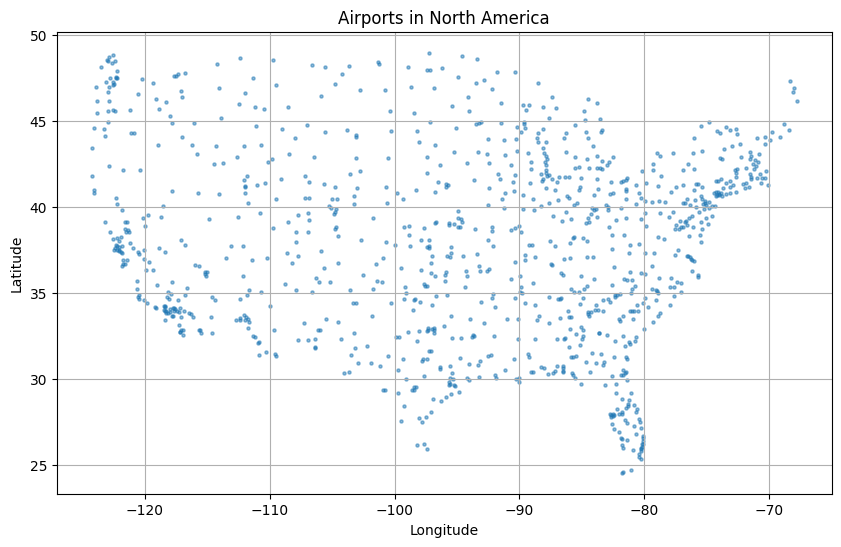

In [ ]:
# prompt: airports データはアメリカの空港の位置が含まれています。lat と lon を用いて、アメリカ大陸上に可視化できますか？

import matplotlib.pyplot as plt

# 北米の範囲を指定（緯度と経度の範囲）
lat_min = 20
lat_max = 50
lon_min = -130
lon_max = -60

# 指定した範囲内の空港のみを抽出
subset = airports[(airports['lat'] >= lat_min) & (airports['lat'] <= lat_max) &
                 (airports['lon'] >= lon_min) & (airports['lon'] <= lon_max)]

# 散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(subset['lon'], subset['lat'], s=5, alpha=0.5)  # s: マーカーサイズ, alpha: 透明度
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airports in North America')
plt.grid(True)
plt.show()
